# PCA

La matriz de covarianza resume la dispersión y correlación entre las variables originales del conjunto de datos. La relación clave entre los valores propios (autovalores) de esta matriz y los componentes principales es la siguiente:

1. Valores propios en la diagonal de la matriz de covarianza:

La matriz de covarianza es simétrica y real, por lo que es diagonalizable mediante una base ortonormal de vectores propios (autovectores).
Al diagonalizar dicha matriz, los valores propios aparecen en la diagonal de la matriz diagonal (diagonalización ortogonal).
Cada valor propio mide la varianza capturada por el vector propio correspondiente.

2. Componentes principales y vectores propios:

Los componentes principales son justamente los vectores propios de la matriz de covarianza.
Cada vector propio define una dirección en el espacio original de las variables donde la varianza de los datos proyectados es máxima para esa dirección, dado que los vectores propios son ortogonales entre sí.

3. Significado directo de los valores propios para PCA:

El valor propio asociado a cada componente principal representa la cantidad de varianza explicada por ese componente, mientras que los vectores propios (componentes principales) indican las direcciones ortogonales en las que esta varianza se maximiza.
Por ello, ordenar los componentes principales según sus valores propios descendentes es ordenar las nuevas variables según la cantidad de información (varianza) que retienen del conjunto original.

El método PCA (Análisis de Componentes Principales) aplicado a variables explicativas estandarizadas por dato sirve para:

- Reducir la dimensionalidad del conjunto de variables correlacionadas, condensando la información contenida en muchas variables originales en unas pocas variables nuevas (componentes principales) que son combinaciones lineales de las originales.
  
- Eliminar la multicolinealidad al transformar variables correlacionadas en componentes no correlacionados entre sí, lo cual es crítico cuando las variables explicativas están estandarizadas y se desea un modelo más estable.

- Preservar la mayor varianza posible del conjunto de datos original, favoreciendo que las componentes principales retengan la información esencial aunque con menos dimensiones.
Facilitar la interpretación y visualización de los datos al proyectarlos en un espacio de menor dimensión, habitualmente con uno o dos componentes principales.
Preprocesar los datos para modelos predictivos, mejorando su rendimiento y reduciendo el riesgo de sobreajuste porque el PCA permite manejar mejor el "ruido" y las redundancias entre las variables explicativas estandarizadas.

# Index

1. [Packages](#packages)
2. [Análisis de componentes principales](#análisis-de-componentes-principales)

   
   2.1. [Primera exploración](#primera-exploración)
   
   2.2. [Visualización 3D con 3 componente](#visualización-3d-con-3-componente)

   2.3. [Aumentando la cantidad de componentes](#aumentando-la-cantidad-de-componentes) 

3. [Busco anomalías](#busco-anomalías)

# Packages

In [1]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Cargar el DataFrame filtrado desde data/processed
X_processed_df = pd.read_csv('../data/processed/Preparation-X_processed_df.csv')
data_filtrada = pd.read_csv('../data/processed/EDA-data_filtrada.csv')
y = data_filtrada['is_fraud']


# Análisis de componentes principales

## Primera exploración

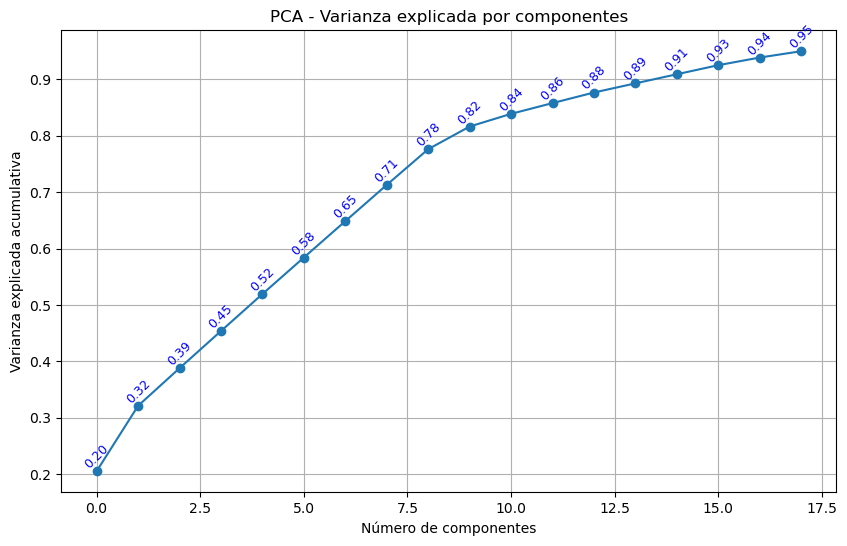

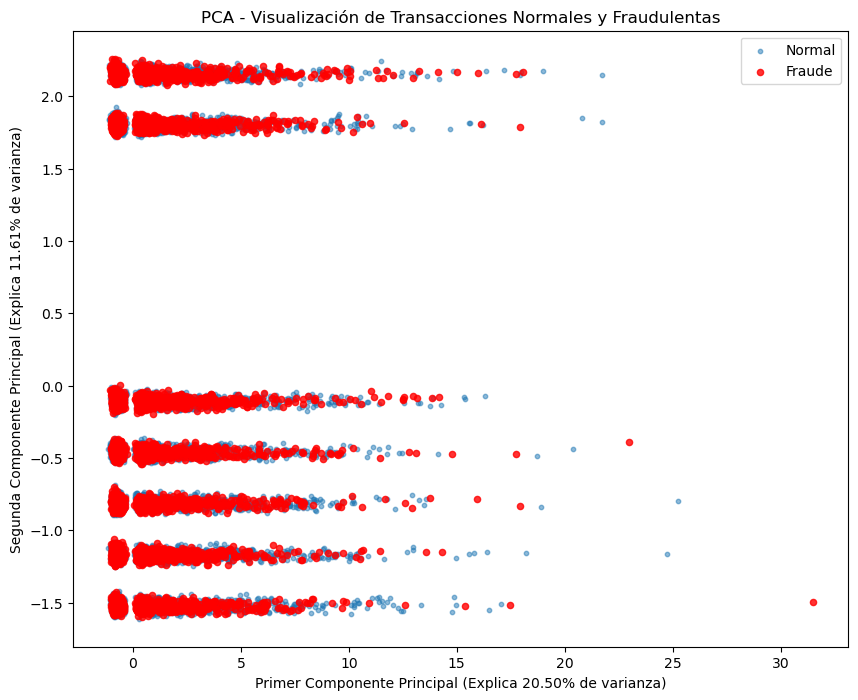

Interpretación:
- Si los puntos rojos (fraudes) están agrupados en áreas específicas, indica que el PCA puede ayudar a detectar patrones de fraude
- Si están dispersos por todo el gráfico, significa que los fraudes no siguen un patrón claro en las dos primeras componentes
- Los outliers (puntos alejados del grupo principal) podrían representar transacciones anómalas


In [6]:
# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de varianza
X_pca = pca.fit_transform(X_processed_df)

# Visualizar varianza explicada
plt.figure(figsize=(10, 6))
var_acum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_acum, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa')
plt.title('PCA - Varianza explicada por componentes')
plt.grid(True)
# Agregar etiquetas de valores
for i, v in enumerate(var_acum):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9, color='blue', rotation=45)
plt.show()

# Crear DataFrame con componentes principales y variable objetivo
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['is_fraud'] = y.values

# Visualizar primeros dos componentes coloreados por fraude
plt.figure(figsize=(10, 8))
fraud_data = pca_df[pca_df['is_fraud'] == 1]
normal_data = pca_df[pca_df['is_fraud'] == 0]
plt.scatter(normal_data['PC1'], normal_data['PC2'], alpha=0.5, label='Normal', s=10)
plt.scatter(fraud_data['PC1'], fraud_data['PC2'], alpha=0.8, label='Fraude', s=20, color='red')
plt.xlabel('Primer Componente Principal (Explica {:.2f}% de varianza)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda Componente Principal (Explica {:.2f}% de varianza)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('PCA - Visualización de Transacciones Normales y Fraudulentas')
plt.legend()
plt.show()

print("Interpretación:")
print("- Si los puntos rojos (fraudes) están agrupados en áreas específicas, indica que el PCA puede ayudar a detectar patrones de fraude")
print("- Si están dispersos por todo el gráfico, significa que los fraudes no siguen un patrón claro en las dos primeras componentes")
print("- Los outliers (puntos alejados del grupo principal) podrían representar transacciones anómalas")

## Visualización 3D con 3 componente

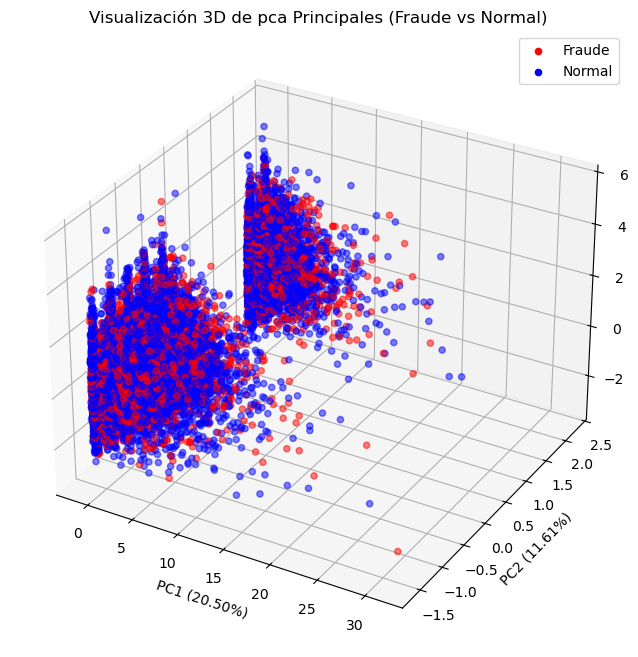

Interpretación:
- El gráfico muestra la distribución de las transacciones en el espacio de las tres primeras pca principales.
- Los puntos rojos representan transacciones fraudulentas y los azules transacciones normales.
- Si los fraudes (rojo) se agrupan en zonas específicas, el PCA ayuda a separar patrones de fraude.
- Si los fraudes están dispersos, no hay un patrón claro en estas tres componentes.
- Outliers alejados del grupo principal pueden indicar transacciones anómalas.


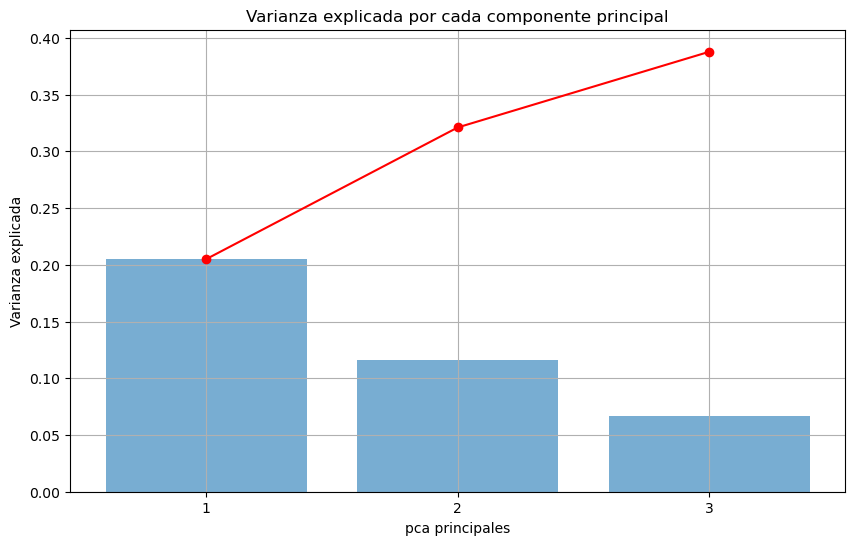

In [29]:
# Aplicar PCA
componentes_3 = PCA(n_components=3) #reducimos a 3 pca
pca_3 = componentes_3.fit_transform(X_processed_df)


# Crear DataFrame con pca principales y variable objetivo
pca_df = pd.DataFrame(pca_3, columns=[f'PC{i+1}' for i in range(pca_3.shape[1])])
pca_df['is_fraud'] = y.values

# Visualización 3D de los pca principales, coloreando por clase
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if f == 1 else 'blue' for f in pca_df_3['is_fraud']]
scatter = ax.scatter(pca_df_3['PC1'], pca_df_3['PC2'], pca_df_3['PC3'], c=colors, alpha=0.5)
ax.set_xlabel('PC1 (%.2f%%)' % (componentes_3.explained_variance_ratio_[0]*100))
ax.set_ylabel('PC2 (%.2f%%)' % (componentes_3.explained_variance_ratio_[1]*100))
ax.set_zlabel('PC3 (%.2f%%)' % (componentes_3.explained_variance_ratio_[2]*100))
ax.set_title('Visualización 3D de pca Principales (Fraude vs Normal)')
legend_labels = {'red': 'Fraude', 'blue': 'Normal'}
for color, label in legend_labels.items():
    ax.scatter([], [], [], c=color, label=label)
ax.legend()
plt.show()

# Interpretación del gráfico
print('Interpretación:')
print('- El gráfico muestra la distribución de las transacciones en el espacio de las tres primeras pca principales.')
print('- Los puntos rojos representan transacciones fraudulentas y los azules transacciones normales.')
print('- Si los fraudes (rojo) se agrupan en zonas específicas, el PCA ayuda a separar patrones de fraude.')
print('- Si los fraudes están dispersos, no hay un patrón claro en estas tres componentes.')
print('- Outliers alejados del grupo principal pueden indicar transacciones anómalas.')

#Visualizamos la varinza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1,4), componentes_3.explained_variance_ratio_, alpha=0.6)
plt.plot(range(1,4), np.cumsum(componentes_3.explained_variance_ratio_), 'ro-')
plt.xlabel('pca principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.xticks(range(1,4))
plt.grid(True)
plt.show()

## Aumentando la cantidad de componentes

Número de componentes para 78% de varianza: 10
Varianza explicada acumulada: 0.8165


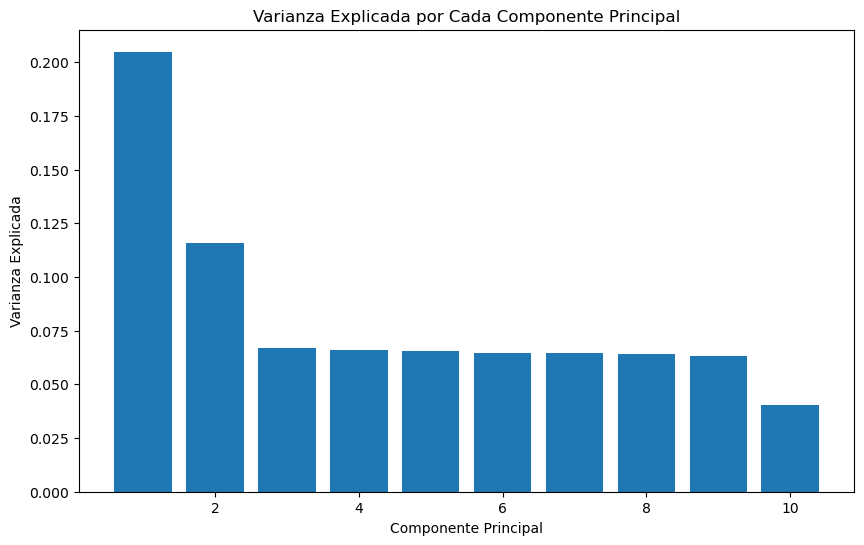

In [ ]:
# Usar PCA con el número de componentes que explican el 78% de varianza
pca_78 = PCA(n_components=0.78)
X_pca_78 = pca_78.fit_transform(X_processed_df)

# Crear DataFrame con componentes principales y variable objetivo
pca_df = pd.DataFrame(componentes_3, columns=[f'PC{i+1}' for i in range(componentes_3.shape[1])])
pca_df['is_fraud'] = y.values

print(f"Número de componentes para 78% de varianza: {pca_78.n_components_}")
print(f"Varianza explicada acumulada: {np.sum(pca_78.explained_variance_ratio_):.4f}")

# Visualizar varianza explicada por componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_78.explained_variance_ratio_)+1), pca_78.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

Vemos la cantidad de variabilidad explicada de cada componente y hacemos un dataframe con los componentes que nos interesan

Con 9 componentes

In [23]:
# Aplicar PCA
pca = PCA(n_components=9) #reducimos a 9 componentes
componentes = pca.fit_transform(X_processed_df)

# Crear DataFrame con componentes principales y variable objetivo
pca_df = pd.DataFrame(componentes, columns=[f'PC{i+1}' for i in range(componentes.shape[1])])
pca_df['is_fraud'] = y.values
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,is_fraud
0,0.668417,-0.462934,0.319948,-0.209743,0.999574,0.716545,-1.027151,-0.784270,-0.196139,1
1,-0.696218,-0.438219,-0.498828,-0.927998,-0.505563,0.237889,-0.275514,-0.961630,0.947394,0
2,-0.742342,-1.543016,-1.454517,-0.741368,0.688735,-1.321655,-0.696768,-0.169009,-0.554258,0
3,-0.952531,1.773222,0.803731,1.054242,0.380571,0.916961,-1.100631,0.668569,-1.204105,0
4,0.415821,-0.495623,-0.375468,0.460079,0.999635,1.184609,0.347315,-1.088583,-1.344796,0
...,...,...,...,...,...,...,...,...,...,...
42462,3.275164,2.138366,-0.176236,0.143863,-0.726406,1.200906,-0.069495,1.491180,-0.324121,1
42463,0.854785,-1.493468,0.192582,-0.707750,-0.923045,0.397146,0.458374,-0.282448,0.834221,1
42464,1.899131,-0.468957,-0.058832,-0.398006,0.345208,-1.404882,-0.229133,0.276800,-0.578521,0
42465,7.051008,-0.438180,-1.081016,-0.961697,-0.795401,0.704179,0.643320,-0.572913,0.720097,0


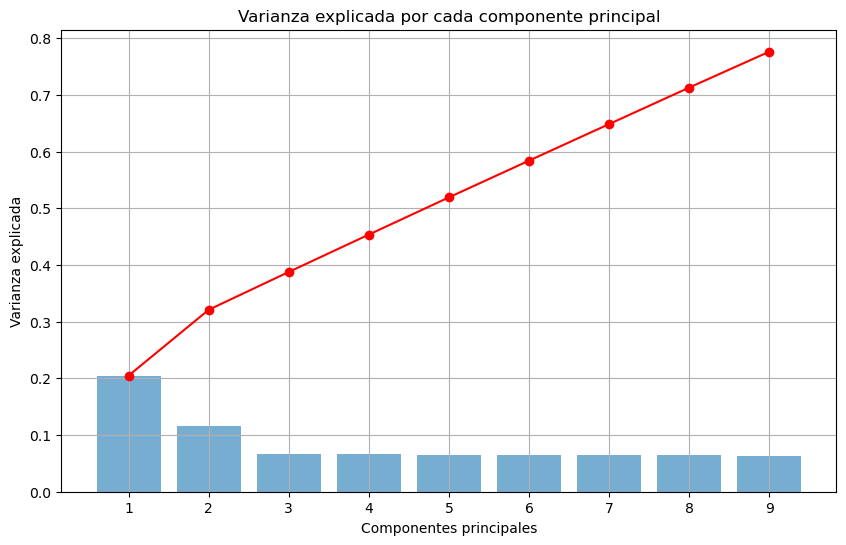

In [15]:
#Visualizamos la varinza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1,10), pca.explained_variance_ratio_, alpha=0.6)
plt.plot(range(1,10), np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.xticks(range(1,10))
plt.grid(True)
plt.show()

# Busco anomalías

In [ ]:
# Reconstruir los datos a partir de los componentes principales
reconstruidos = pca.inverse_transform(componentes)
#calcular el error de reconstrucción MSE
mse = np.mean(np.square(X_processed_df - reconstruidos), axis=1)

#Identificar anomalías (umbral = percentil 95)
umbral = np.percentile(mse, 95)
anomalias = mse > umbral

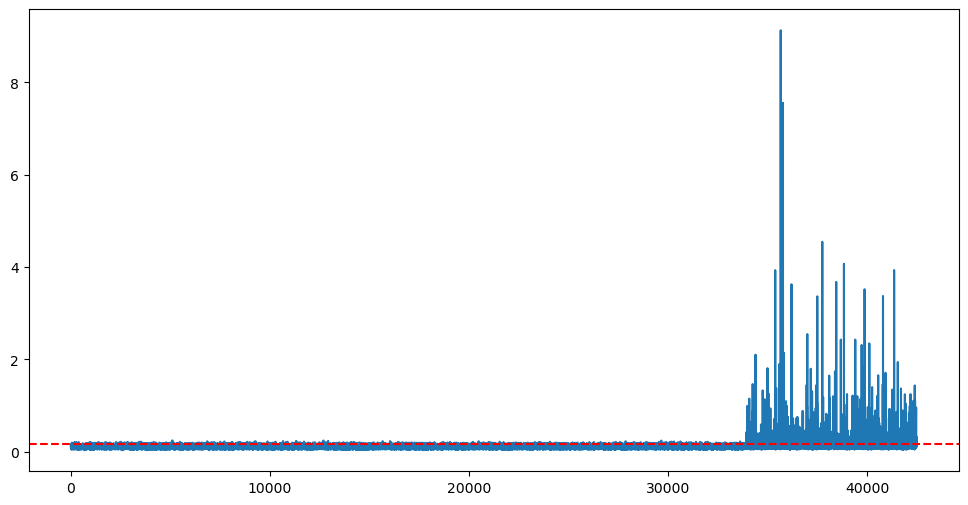

In [31]:
#Visualizar anomalías
plt.figure(figsize=(12, 6))
plt.plot(data_filtrada.index, mse, label='Error de reconstrucción')
plt.axhline(y=umbral, color='r', linestyle='--', label='Umbral')

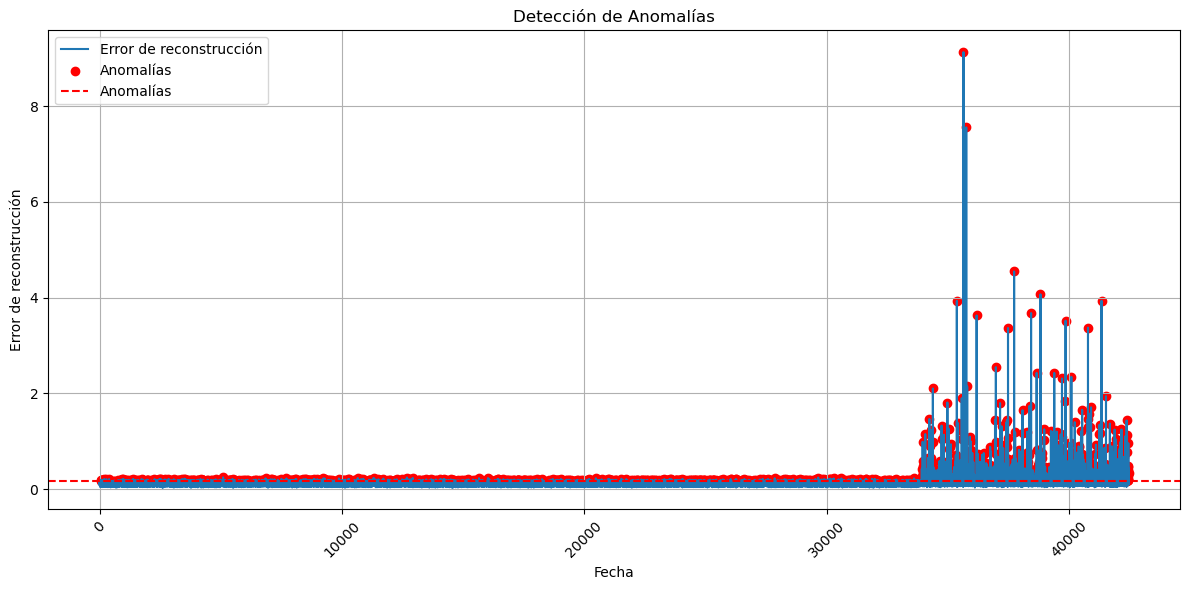

In [33]:
#Visualizar anomalias
plt.figure(figsize=(12, 6))
plt.plot(data_filtrada.index, mse, label='Error de reconstrucción')
plt.scatter(data_filtrada.index[anomalias], mse[anomalias], color='r', label='Anomalías')
plt.axhline(y=umbral, color='r', linestyle='--', label='Anomalías')
plt.title('Detección de Anomalías')
plt.xlabel('Fecha')
plt.ylabel('Error de reconstrucción')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si se enfoca el analisís con un enfoque temporal, se podrían visualizar las fechas anómalas:

´´´python

#Analizamos fechas con anomalías
anomalias_df = data_filtrada[anomalias]
print("Fechas con anomalías:")
print(anomalias_df.index)

#Vemos los 5 días con mayores anomalías
top_anomalias = anomalias_df.iloc[np.argsort(-mse[anomalias])[:5]]
print("/nTop 5 días con mayores anomalias:")
print(top_anomalias)

´´´